In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv(r"C:\datasets\Entities.csv")

In [30]:
df = df[df.purpose == 'For Sale']

In [31]:
df.drop(['Unnamed: 0' , 'property_id' , 'location_id' , 'page_url' , 'date_added' , 'purpose' , 'agency' , 'agent' , 'location'] , axis = 1 , inplace = True)

In [32]:
numeric_col = ['latitude' , 'longitude'	, 'baths' , 'bedrooms' , 'Total_Area']
for col in numeric_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    min_range = q1 - (1.5 * IQR)
    max_range = q3 + (1.5 * IQR)
    df = df[(df[col] >= (q1 - 1.5 * IQR)) & (df[col] <= (q3 + 1.5 * IQR))]

In [33]:
q1 = df['Total_Area'].quantile(0.25)
q3 = df['Total_Area'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
df = df[(df[col] >= (q1 - 1.5 * IQR)) & (df[col] <= (q3 + 1.5 * IQR))]

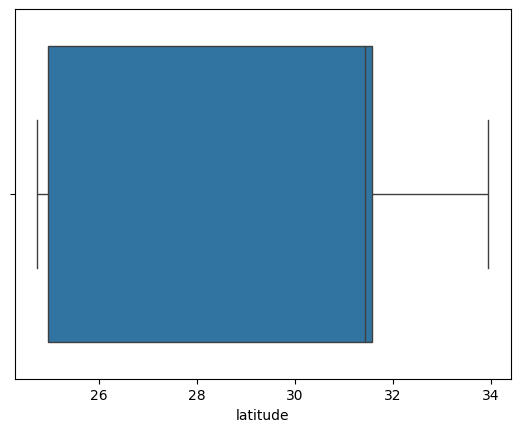

In [7]:
sns.boxplot(x = 'latitude' , data = df)
plt.show()

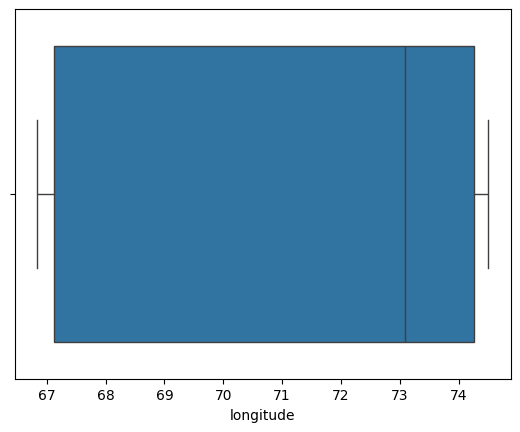

In [8]:
sns.boxplot(x = 'longitude' , data = df)
plt.show()

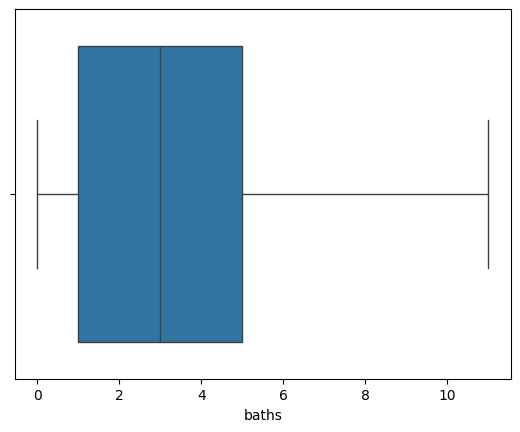

In [9]:
sns.boxplot(x = 'baths' , data = df)
plt.show()

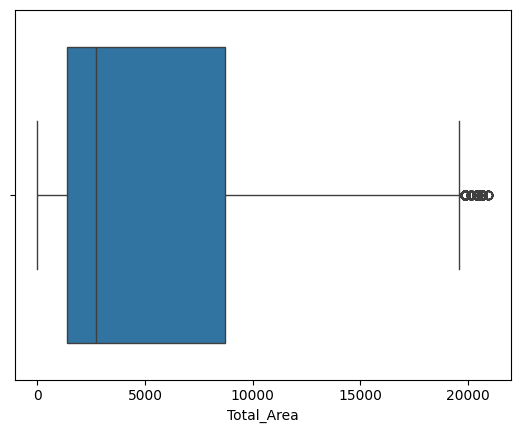

In [10]:
sns.boxplot(x = 'Total_Area' , data = df)
plt.show()

In [11]:
df = pd.get_dummies(df , columns = ['province_name'] , drop_first = True)

In [12]:
le_col = ['city' , 'property_type']
le = LabelEncoder()
for i in le_col:
    df[i] =  le.fit_transform(df[i])

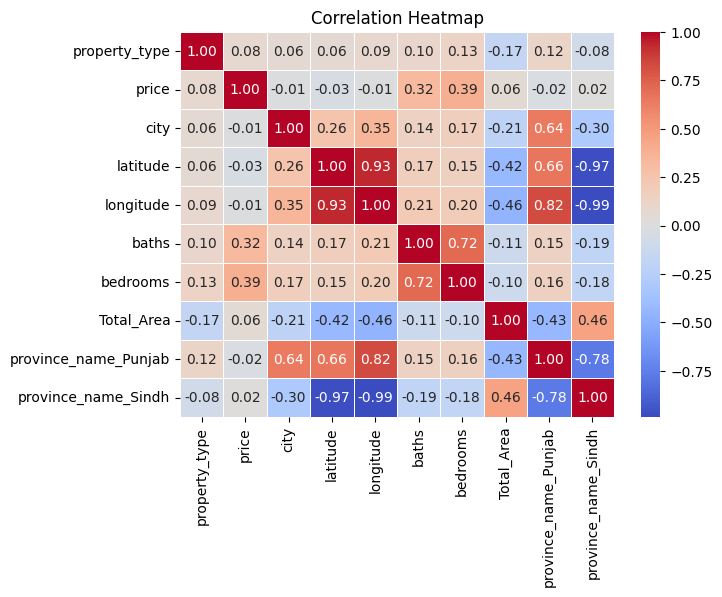

In [13]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
ss_col = ['latitude' , 'longitude' , 'Total_Area']
ss = StandardScaler()
for i in ss_col:
    df[i] = ss.fit_transform(df[[i]])

In [15]:
x = df.drop('price' , axis = 1)
y = df.price

In [16]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 42 , test_size = 0.25)

In [17]:
model = RandomForestRegressor(random_state = 42 , max_depth = 30 , n_estimators = 200)
model.fit(x_train , y_train)

RandomForestRegressor(max_depth=30, n_estimators=200, random_state=42)

In [18]:
print(f'test score : {model.score(x_test , y_test)}')
print(f'train score : {model.score(x_train , y_train)}')

test score : 0.8760440153854833
train score : 0.95086151713269


In [19]:
import joblib

joblib.dump(model, 'Entities_rf_model.pkl')

['Entities_rf_model.pkl']

In [20]:
x_test.head(3)

,property_type,city,latitude,longitude,baths,bedrooms,Total_Area,province_name_Punjab,province_name_Sindh
142861,2,1,1.143272,0.501587,0,0,-0.003808,False,False
57471,2,4,1.116390,0.538489,5,6,2.009298,True,False
8755,2,3,0.500014,0.866498,7,5,-0.003808,True,False


In [21]:
y_test.head(3)

142861    95000000
57471      9500000
8755      45000000
Name: price, dtype: int64